Это примеры моделек которые я пробовал


Импортируем библиотеки


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Смотрим данные

In [1]:
df = pd.read_excel("train.xlsx")
df.head(-1)

NameError: name 'pd' is not defined

Создаем столбики с годом месяцем 

In [ ]:
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
df['week_of_year'] = df.index.isocalendar().week
df['month'] = df.index.month   
df['year'] = df.index.year   
df.head(-1)

,Цена на арматуру,week_of_year,month,year
dt,,,,
2015-01-05,32900,2,1,2015
2015-01-12,32500,3,1,2015
2015-01-19,32000,4,1,2015
2015-01-26,30700,5,1,2015
2015-02-02,30300,6,2,2015
...,...,...,...,...
2022-07-25,47500,30,7,2022
2022-08-01,47500,31,8,2022
2022-08-08,49000,32,8,2022


Смотрим на график цен наших данных

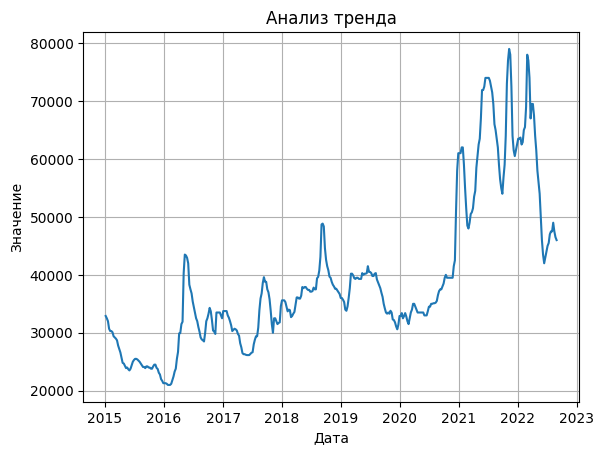

In [ ]:
plt.plot(df.index, df['Цена на арматуру'])
plt.title('Анализ тренда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()


Делаем сользящее среднее посмотреть

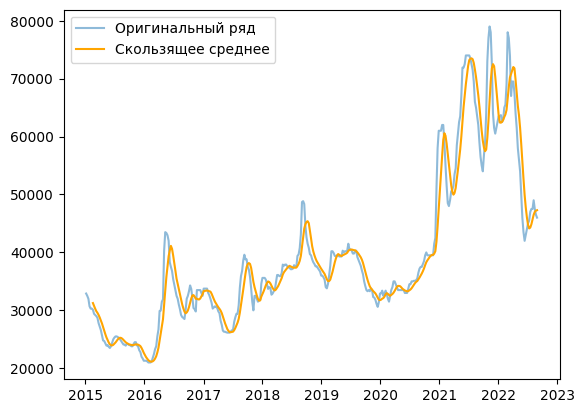

In [ ]:
df['moving_avg'] = df['Цена на арматуру'].rolling(window=7).mean()

plt.plot(df['Цена на арматуру'], label='Оригинальный ряд', alpha=0.5)
plt.plot(df['moving_avg'], label='Скользящее среднее', color='orange')
plt.legend()
plt.show()


In [ ]:
Выводим график трендов и куда он направлен

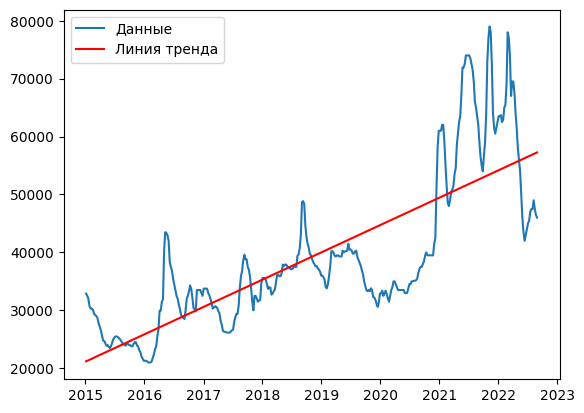

Тренд растущий


In [ ]:
x = np.arange(len(df))
y = df['Цена на арматуру'].values
coef = np.polyfit(x, y, 1)
trend_line = np.poly1d(coef)
plt.plot(df['Цена на арматуру'], label='Данные')
plt.plot(df.index, trend_line(x), color='red', label='Линия тренда')
plt.legend()
plt.show()
slope = coef[0]
if slope > 0:
    print('Тренд растущий')
elif slope < 0:
    print('Тренд падающий')
else:
    print('Стагнация')


смотрим в какие дни у нас в данных используются

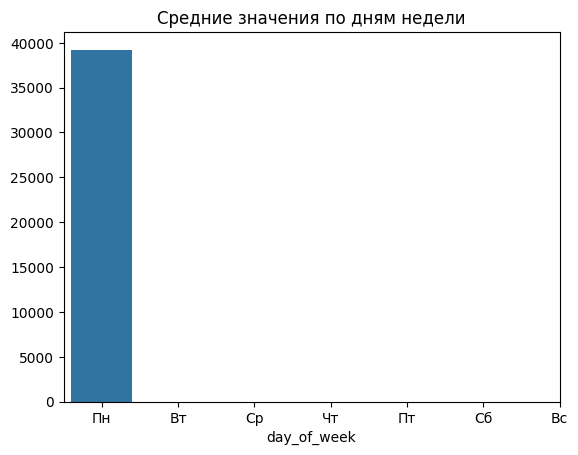

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as sns  


df['day_of_week'] = df.index.dayofweek  
weekly_trend = df.groupby('day_of_week')['Цена на арматуру'].mean()

sns.barplot(x=weekly_trend.index, y=weekly_trend.values)  
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.title('Средние значения по дням недели')  
plt.show()


смотрим различия в суммах по месяцам

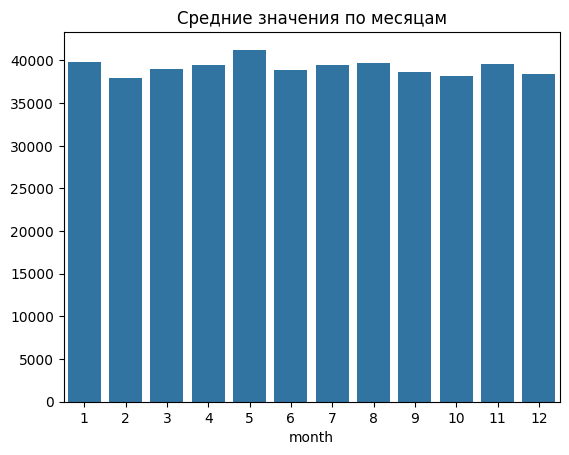

In [ ]:
df['month'] = df.index.month  
monthly_trend = df.groupby('month')['Цена на арматуру'].mean()

sns.barplot(x=monthly_trend.index, y=monthly_trend.values)
plt.title('Средние значения по месяцам')  
plt.show()


ну и также значение по годам

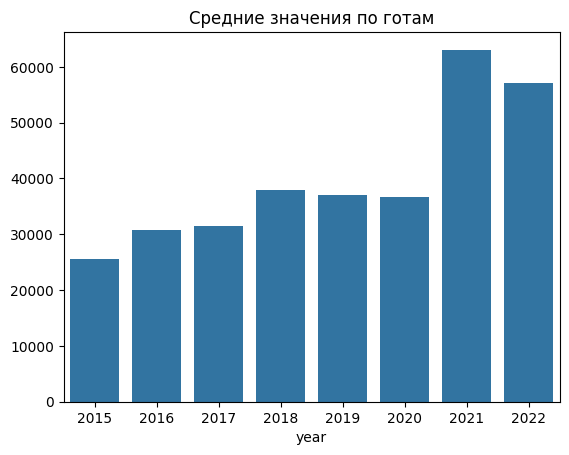

In [ ]:
df['year'] = df.index.year  
monthly_trend = df.groupby('year')['Цена на арматуру'].mean()

sns.barplot(x=monthly_trend.index, y=monthly_trend.values)
plt.title('Средние значения по готам')  
plt.show()

выводим графики трендов шумов и сезонности

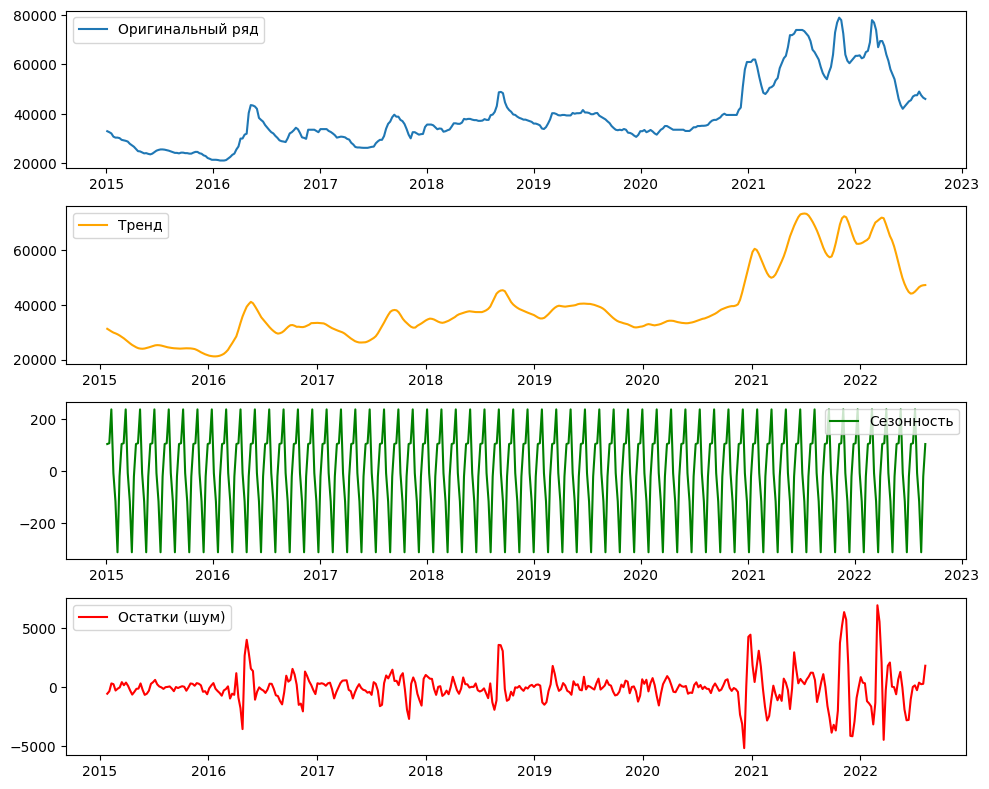

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose  


decompose_result = seasonal_decompose(df['Цена на арматуру'], model='additive', period=7)

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Цена на арматуру'], label='Оригинальный ряд')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decompose_result.trend, label='Тренд', color='orange')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decompose_result.seasonal, label='Сезонность', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decompose_result.resid, label='Остатки (шум)', color='red')
plt.legend()

plt.tight_layout()
plt.show()


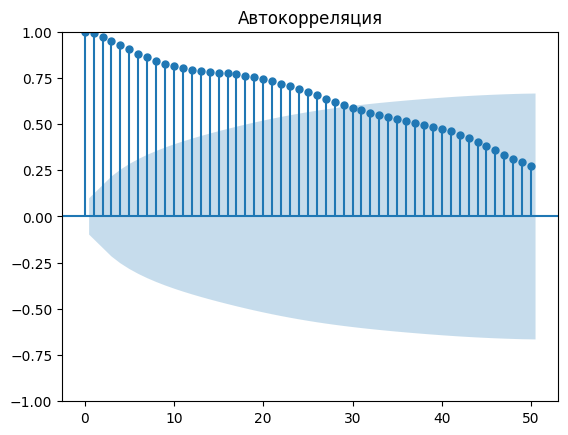

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf  

plot_acf(df['Цена на арматуру'], lags=100)  
plt.title('Автокорреляция')  
plt.show()


Сезонность есть видно по графику но мы выводим еще и так

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency([
    df['Цена на арматуру'][:len(df)//2], 
    df['Цена на арматуру'][len(df)//2:]
])

if p < 0.05:
    print("Сезонность присутствует!")
else:
    print("Сезонности нет.")



Сезонность присутствует!


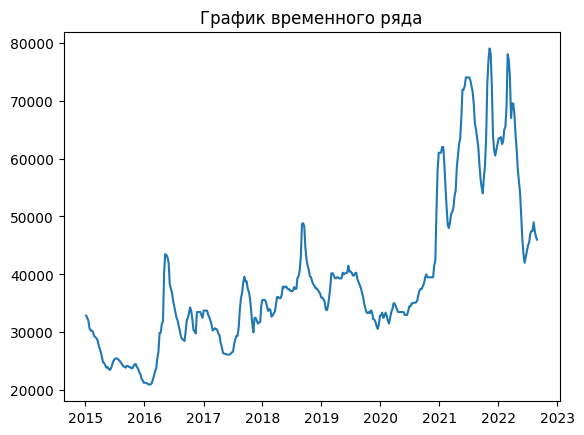

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Цена на арматуру'])
plt.title('График временного ряда')
plt.show()


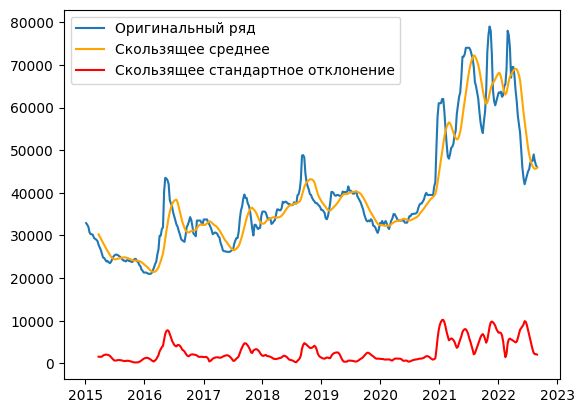

In [ ]:
rolling_mean = df['Цена на арматуру'].rolling(window=12).mean()
rolling_std = df['Цена на арматуру'].rolling(window=12).std()

plt.plot(df['Цена на арматуру'], label='Оригинальный ряд')
plt.plot(rolling_mean, label='Скользящее среднее', color='orange')
plt.plot(rolling_std, label='Скользящее стандартное отклонение', color='red')
plt.legend()
plt.show()


In [ ]:
оцениваем стационарность ряда модельки обычно лутше с стационарным рядом работают но вроде как не всегда

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Цена на арматуру'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("Ряд стационарный (отвергаем H0)")
else:
    print("Ряд не стационарный (не отвергаем H0)")


ADF Statistic: -1.9258699893713453
p-value: 0.3199906102569917
Critical Values: {'1%': np.float64(-3.4470566389664703), '5%': np.float64(-2.8689037160476016), '10%': np.float64(-2.570692663557422)}
Ряд не стационарный (не отвергаем H0)


приводим ряд к стационарному 3 разными вариантами

1 Вариант дифириинцирование

In [ ]:
from statsmodels.tsa.stattools import adfuller

data_diff = df['Цена на арматуру'].diff().dropna()

results = adfuller(data_diff)

print('ADF Statistic:', results[0])
print('p-value:', results[1])
print('Critical Values:', results[4])


if results[1] < 0.05:
    print("Ряд стационарный (отвергаем H0)")
else:
    print("Ряд не стационарный (не отвергаем H0)")


ADF Statistic: -7.7060615041152065
p-value: 1.3006938373810178e-11
Critical Values: {'1%': np.float64(-3.447405233596701), '5%': np.float64(-2.8690569369014605), '10%': np.float64(-2.5707743450830893)}
Ряд стационарный (отвергаем H0)


2 вариант чтото не так

In [ ]:
# import numpy as np

# df['Цена на арматуру log'] = np.log(df['Цена на арматуру'])

# plt.figure(figsize=(10, 6))
# plt.plot(df['Цена на арматуру log'])
# plt.title('Логарифмированные данные')
# plt.show()

# results = adfuller(df['Цена на арматуру log'].dropna())
# print('ADF Statistic:', results[0])
# print('p-value:', results[1])

# if results[1] < 0.05:
#     print("Ряд стационарный после логарифмирования")
# else:
#     print("Ряд не стационарный после логарифмирования")


3 вариант

In [ ]:
# df['Цена на арматуру сезонное дифф'] = df['Цена на арматуру'].diff(12)

# plt.figure(figsize=(10, 6))
# plt.plot(df['Цена на арматуру сезонное дифф'].dropna())
# plt.title('Сезонное дифференцирование (S=12)')
# plt.show()
# data_diff = adfuller(df['Цена на арматуру сезонное дифф'].dropna())
# print('ADF Statistic (сезонное дифференцирование):', results[0])
# print('p-value (сезонное дифференцирование):', results[1])

Делим данные на тестовую и тренировочную выборку

In [ ]:

train_size = int(len(data_diff) * 0.8)
train_data = data_diff.iloc[:train_size]
test_data = data_diff .iloc[train_size:]

train_values = train_data
test_values = test_data

train_index = train_data.index
test_index = test_data.index



дальше идут модельки

ExponentialSmoothing

Средняя абсолютная ошибка (MAE): 3572.62
Корень из среднеквадратичной ошибки (RMSE): 4302.13
Коэффициент детерминации (R²): -1.33


c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


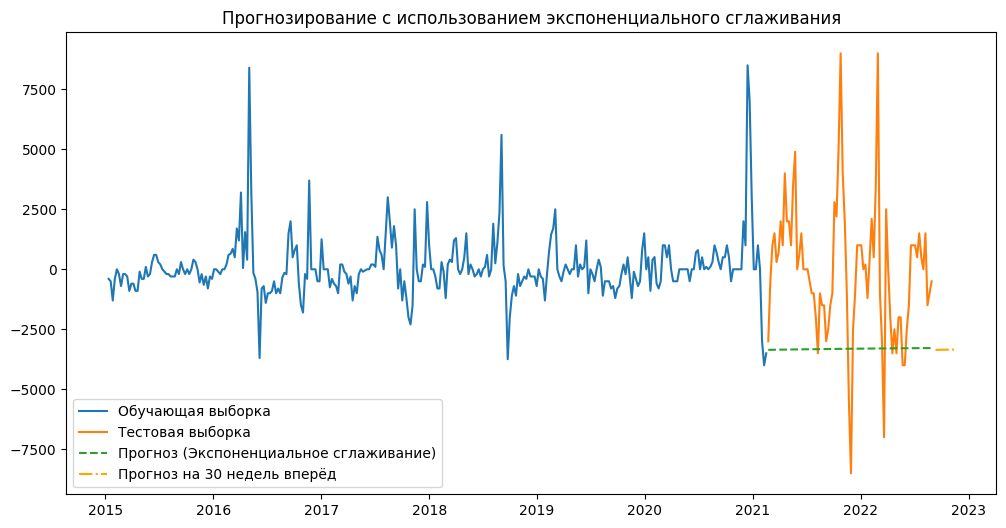

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


future_weeks = 10


train_size = int(len(data_diff) * 0.8)
train_data = data_diff.iloc[:train_size]
test_data = data_diff.iloc[train_size:]

model = ExponentialSmoothing(train_data, trend='add', seasonal=None, damped_trend=True)
fit_model = model.fit()

predicted_values = fit_model.forecast(len(test_data))
future_forecast = fit_model.forecast(future_weeks)
future_dates = pd.date_range(start=data_diff.index[-1], periods=future_weeks + 1, freq='W')[1:]

mae = mean_absolute_error(test_data, predicted_values)
rmse = np.sqrt(mean_squared_error(test_data, predicted_values))
r2 = r2_score(test_data, predicted_values)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Обучающая выборка')
plt.plot(test_data, label='Тестовая выборка')
plt.plot(predicted_values, label='Прогноз (Экспоненциальное сглаживание)', linestyle='--')
plt.plot(future_dates, future_forecast, label='Прогноз на 30 недель вперёд', linestyle='-.', color='orange')
plt.legend()
plt.title('Прогнозирование с использованием экспоненциального сглаживания')
plt.show()

ARIMA

c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


Средняя абсолютная ошибка (MAE): 2042.30
Корень из среднеквадратичной ошибки (RMSE): 2810.61
Коэффициент детерминации (R²): 0.01


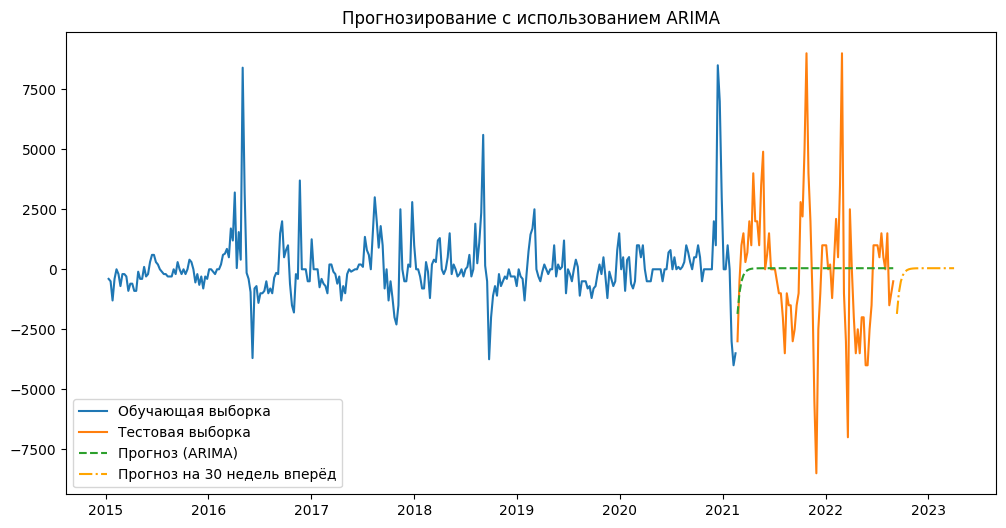

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



future_weeks = 30


train_size = int(len(data_diff) * 0.8)
train_data = data_diff.iloc[:train_size]
test_data = data_diff.iloc[train_size:]

model = ARIMA(train_data, order=(1, 1, 1))
fit_model = model.fit()


predicted_values = fit_model.forecast(len(test_data))

future_forecast = fit_model.forecast(steps=future_weeks)
future_dates = pd.date_range(start=data_diff.index[-1], periods=future_weeks + 1, freq='W')[1:]

mae = mean_absolute_error(test_data, predicted_values)
rmse = np.sqrt(mean_squared_error(test_data, predicted_values))
r2 = r2_score(test_data, predicted_values)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Обучающая выборка')
plt.plot(test_data, label='Тестовая выборка')
plt.plot(test_data.index, predicted_values, label='Прогноз (ARIMA)', linestyle='--')
plt.plot(future_dates, future_forecast, label='Прогноз на 30 недель вперёд', linestyle='-.', color='orange')
plt.legend()
plt.title('Прогнозирование с использованием ARIMA')
plt.show()


SARIMAX

c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Средняя абсолютная ошибка (MAE): 2230.04
Корень из среднеквадратичной ошибки (RMSE): 3046.81
Коэффициент детерминации (R²): -0.17


c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


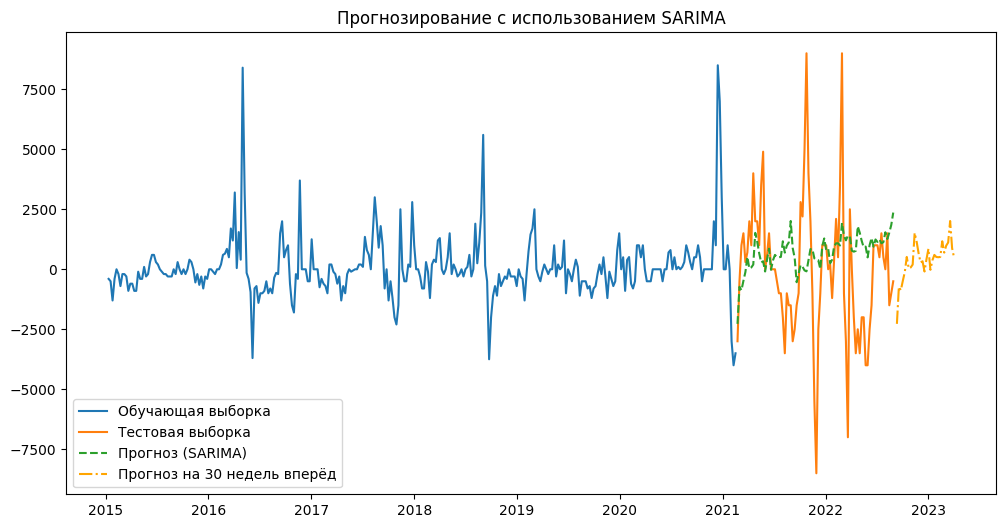

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

future_weeks = 30

train_size = int(len(data_diff) * 0.8)
train_data = data_diff.iloc[:train_size]
test_data = data_diff.iloc[train_size:]

model = SARIMAX(train_data, 
                order=(2, 1, 2), 
                seasonal_order=(1, 1, 1, 52), 
                trend='t',  
                enforce_stationarity=False,  # Отключаем требование к стационарности
                enforce_invertibility=False,  # Отключаем требование к инвертируемости
                disp=True)  # Показываем подробную информацию о процессе оптимизации
fit_model = model.fit()

predicted_values = fit_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

future_forecast = fit_model.forecast(steps=future_weeks)
future_dates = pd.date_range(start=data_diff.index[-1], periods=future_weeks + 1, freq='W')[1:]


mae = mean_absolute_error(test_data, predicted_values)
rmse = np.sqrt(mean_squared_error(test_data, predicted_values))
r2 = r2_score(test_data, predicted_values)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Обучающая выборка')
plt.plot(test_data, label='Тестовая выборка')
plt.plot(test_data.index, predicted_values, label='Прогноз (SARIMA)', linestyle='--')
plt.plot(future_dates, future_forecast, label='Прогноз на 30 недель вперёд', linestyle='-.', color='orange')
plt.legend()
plt.title('Прогнозирование с использованием SARIMA')
plt.show()


RandomForestRegressor

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


future_weeks = 30

train_size = int(len(data_diff) * 0.8)
train_data = data_diff.iloc[:train_size]
test_data = data_diff.iloc[train_size:]

X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data.values
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

model = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")


best_model = grid_search.best_estimator_
predicted_values = best_model.predict(X_test)


future_X = np.arange(len(data_diff), len(data_diff) + future_weeks).reshape(-1, 1)
future_forecast = best_model.predict(future_X)
future_dates = pd.date_range(start=data_diff.index[-1], periods=future_weeks + 1, freq='W')[1:]


mae = mean_absolute_error(test_data, predicted_values)
rmse = np.sqrt(mean_squared_error(test_data, predicted_values))
r2 = r2_score(test_data, predicted_values)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")


plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Обучающая выборка')
plt.plot(test_data, label='Тестовая выборка')
plt.plot(test_data.index, predicted_values, label='Прогноз (Random Forest)', linestyle='--')
plt.plot(future_dates, future_forecast, label='Прогноз на 30 недель вперёд', linestyle='-.', color='orange')
plt.legend()
plt.title('Прогнозирование с использованием Random Forest (Grid Search)')
plt.show()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

KeyboardInterrupt: 

LSTM

Epoch 1/10


c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1347
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


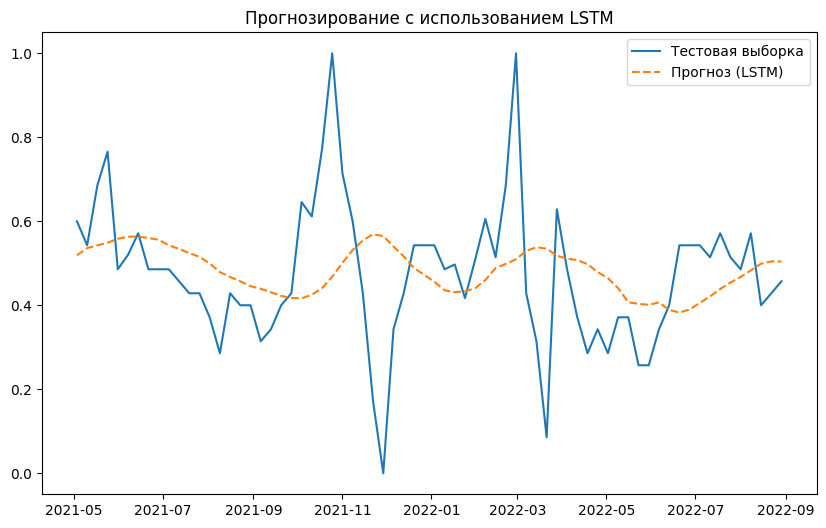

Mean Squared Error (MSE): 0.03087692808369588
Root Mean Squared Error (RMSE): 0.1757183202847554
Mean Absolute Error (MAE): 0.12920508834537192
R-squared (R²): -0.11183021183575281
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━

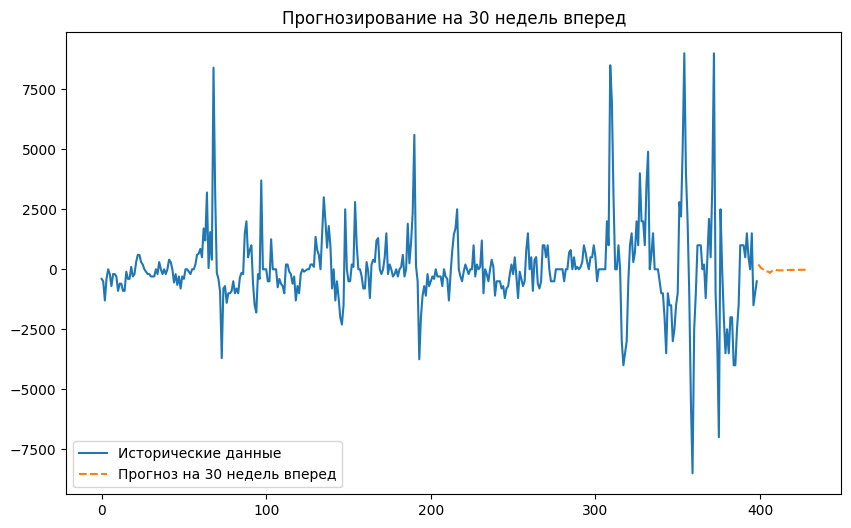

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_diff.values.reshape(-1, 1))


train_size = int(len(scaled_data) * 0.8)
train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, Y_train = create_dataset(train_scaled, time_step)
X_test, Y_test = create_dataset(test_scaled, time_step)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')


model_lstm.fit(X_train, Y_train, epochs=10, batch_size=32)


predicted_values_lstm = model_lstm.predict(X_test)


plt.figure(figsize=(10, 6))
plt.plot(test_data.index[time_step:time_step + len(Y_test)], Y_test, label='Тестовая выборка')
plt.plot(test_data.index[time_step:time_step + len(predicted_values_lstm)], predicted_values_lstm, label='Прогноз (LSTM)', linestyle='--')
plt.legend()
plt.title('Прогнозирование с использованием LSTM')
plt.show()

mse = mean_squared_error(Y_test, predicted_values_lstm)
rmse = sqrt(mse)
mae = mean_absolute_error(Y_test, predicted_values_lstm)
r2 = r2_score(Y_test, predicted_values_lstm)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

last_values = scaled_data[-time_step:]  
predicted_values_30_weeks = []

for i in range(30):
    last_values = last_values.reshape(1, time_step, 1)  
    next_pred = model_lstm.predict(last_values)
    predicted_values_30_weeks.append(next_pred[0, 0])
    last_values = np.append(last_values[0][1:], next_pred[0, 0])  


predicted_values_30_weeks = scaler.inverse_transform(np.array(predicted_values_30_weeks).reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(range(len(data_diff)), scaler.inverse_transform(scaled_data), label='Исторические данные')
plt.plot(range(len(data_diff), len(data_diff) + 30), predicted_values_30_weeks, label='Прогноз на 30 недель вперед', linestyle='--')
plt.legend()
plt.title('Прогнозирование на 30 недель вперед')
plt.show()


SARIMAX с параметрами

Размер тренировочных данных: (320, 1)
Размер тестовых данных: (80, 1)


c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


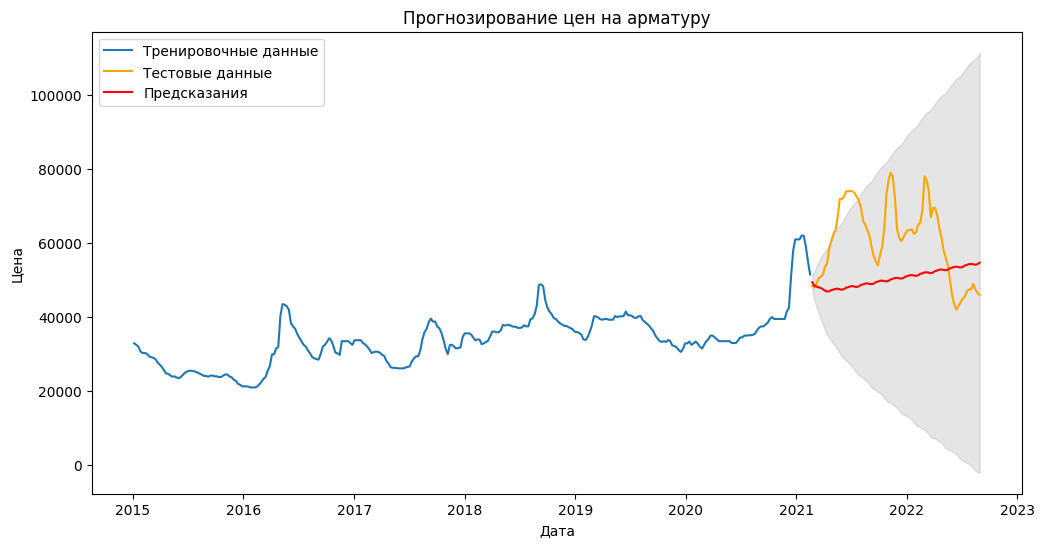

Mean Squared Error (MSE): 236487335.65258035
Root Mean Squared Error (RMSE): 15378.144740266309
Mean Absolute Error (MAE): 13319.240561599527


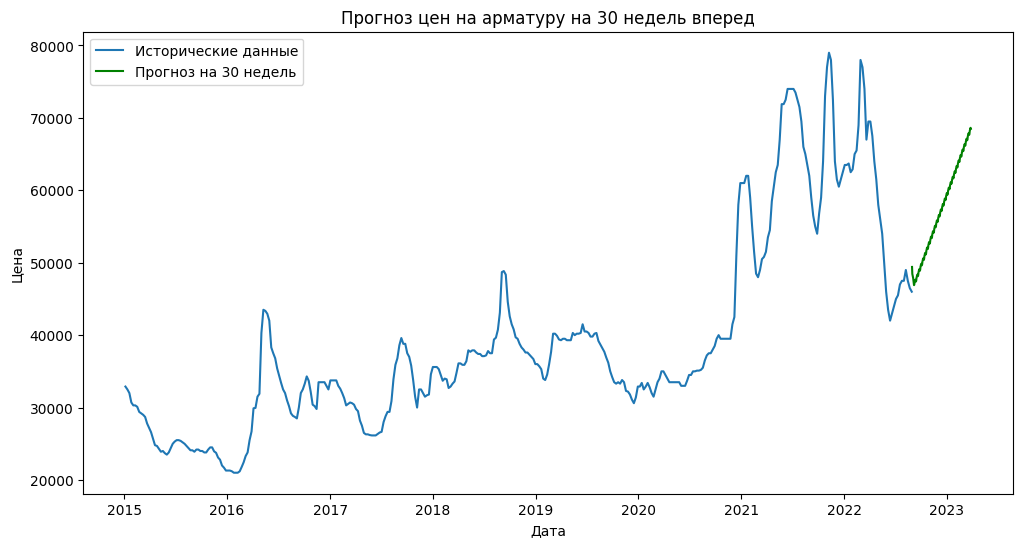

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


df = pd.read_excel('train.xlsx', parse_dates=['dt'], index_col='dt')


train_size = int(len(df) * 0.8)
train = df[:train_size]  
test = df[train_size:]   


print(f"Размер тренировочных данных: {train.shape}")
print(f"Размер тестовых данных: {test.shape}")

sarima_model = SARIMAX(train['Цена на арматуру'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 7), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)


sarima_result = sarima_model.fit(disp=False)


predictions = sarima_result.get_forecast(steps=len(test))
predicted_prices = predictions.predicted_mean
confidence_intervals = predictions.conf_int()


plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Цена на арматуру'], label='Тренировочные данные')
plt.plot(test.index, test['Цена на арматуру'], label='Тестовые данные', color='orange')
plt.plot(predicted_prices.index, predicted_prices, label='Предсказания', color='red')
plt.fill_between(predicted_prices.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='gray', alpha=0.2)
plt.title('Прогнозирование цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

mse = mean_squared_error(test['Цена на арматуру'], predicted_prices)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(test['Цена на арматуру'], predicted_prices)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

future_dates = [df.index[-1] + pd.Timedelta(days=i) for i in range(1, 30*7+1)]
future_index = pd.DatetimeIndex(future_dates)

future_predictions = sarima_result.get_forecast(steps=30*7)
future_predicted_prices = future_predictions.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Цена на арматуру'], label='Исторические данные')
plt.plot(future_index, future_predicted_prices, label='Прогноз на 30 недель', color='green')
plt.title('Прогноз цен на арматуру на 30 недель вперед')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()
